### Project 4: Predicting Wins in Baseball
_Authors: Jerry Scott Sheehan_

---

In [89]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

## Load Data

There are two data sources.  
- baseball_stats: This one includes all of the teams stats from the season 1998-2017.  I chose this time period because the most recent new franchises began in 1998.  This means all 30 teams will have played the same number of games over that time.
- baseball_wins: This one includes each of the 30 teams wins per season from 1998-2017.

In [90]:
baseball_stats = "./data/Baseball_Stats.csv"
baseball_wins  = "./data/Baseball_Wins.csv"

Read in data with pandas function read.csv

In [91]:
stats=pd.read_csv(baseball_stats)
stats.head()

,Team,HR,R,RBI,IBB,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,Pitches,BB%,K%,OBP,SLG,OPS,ISO,BABIP,LD%,GB%,FB%,IFFB%,HR/FB,wOBA,wRAA,wRC,Pos,RAR,wRC+,Clutch,O-Swing%,Z-Swing%,Swing%,Age Rng,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,BsR
0,Yankees,4049,16169,15498,678,1278,902,551,2559,2045,665,0.268,32432,26060,14508,399336,9.50%,17.50%,0.344,0.440,0.784,0.172,0.298,19.90%,44.40%,35.70%,10.00%,13.20%,0.341,1665.6,16277,-308.8,4658.4,108,-12.98,24.70%,66.00%,44.20%,20 - 46,42.50%,32.50%,25.10%,17.00%,53.80%,29.20%,63.00%,88.20%,80.80%,47.20%,48.70%,63.0
1,Red Sox,3625,16128,15375,815,1123,992,451,2561,1588,556,0.272,31207,27833,15241,408834,9.20%,17.50%,0.344,0.441,0.786,0.169,0.307,20.50%,42.00%,37.50%,10.30%,11.10%,0.341,1671.1,16388,-307.2,4773.4,106,-22.10,24.90%,64.80%,44.00%,20 - 44,42.20%,32.60%,25.30%,15.70%,54.10%,30.30%,64.60%,88.40%,81.40%,48.00%,49.20%,-54.8
2,Rockies,3476,15610,14830,855,942,850,1370,2380,1812,815,0.272,31485,24210,15063,389168,8.40%,18.70%,0.338,0.438,0.776,0.166,0.314,21.30%,44.50%,34.20%,9.30%,11.90%,0.336,1105.9,15624,725.3,2791.8,89,-30.66,26.80%,67.80%,46.70%,20 - 49,38.30%,34.50%,27.20%,17.00%,54.80%,28.20%,62.20%,86.00%,79.00%,48.70%,50.30%,18.7
3,Rangers,3936,15800,15059,634,1106,934,679,2412,1864,727,0.269,31106,26773,14880,390531,8.20%,18.00%,0.333,0.441,0.774,0.173,0.301,20.50%,42.80%,36.80%,10.10%,12.30%,0.335,1093.6,15579,-305.5,3840.1,100,-17.39,27.00%,67.00%,46.20%,19 - 45,41.10%,33.40%,25.50%,16.10%,54.50%,29.40%,61.60%,86.80%,79.10%,47.90%,49.90%,110.4
4,Indians,3446,15187,14483,619,1185,940,734,2481,1773,714,0.264,31110,26009,14632,396036,9.00%,18.40%,0.336,0.425,0.761,0.161,0.302,20.40%,43.40%,36.20%,9.70%,10.80%,0.332,738.7,15254,-303.6,4066.0,103,-16.09,24.80%,65.80%,44.60%,20 - 43,43.00%,32.00%,25.00%,15.80%,55.30%,28.90%,62.40%,87.50%,80.30%,48.30%,49.20%,36.1


In [92]:
wins=pd.read_csv(baseball_wins)
wins.head()

,Year,G,ARI,ATL,BLA,BAL,BOS,CHC,CHW,CIN,CLE,COL,DET,HOU,KCR,LAA,LAD,MIA,MIL,MIN,NYM,NYY,OAK,PHI,PIT,SDP,SFG,SEA,STL,TBR,TEX,TOR,WSN
0,2017,162,93,72,NaN,75,93,92,67,68,102,87,64,101,80,80,104,77,86,85,70,91,75,66,75,71,64,78,83,80,78,76,97
1,2016,162,69,68,NaN,89,93,103,78,68,94,75,86,84,81,74,91,79,73,59,87,84,69,71,78,68,87,86,86,68,95,89,95
2,2015,162,79,67,NaN,81,78,97,76,64,81,68,74,86,95,85,92,71,68,83,90,87,68,63,98,74,84,76,100,80,88,93,83
3,2014,162,64,79,NaN,96,71,73,73,76,85,66,90,70,89,98,94,77,82,70,79,84,88,73,88,77,88,87,90,77,67,83,96
4,2013,163,81,96,NaN,85,97,66,63,90,92,74,93,51,86,78,92,62,74,66,74,85,96,73,94,76,76,71,97,92,91,74,86


## Exploratory Data Analysis

### Start with the Stats dataset

#### Shape

In [93]:
stats.shape

(30, 51)

There are 30 rows which is what we expected because each row represents a team and there are 30 teams.  We then have 51 variables, one of which is the team names so we have 50 features to choose from.

We should change the index column to be the team name which we can do with the set_index function.

In [94]:
stats.set_index('Team', inplace=True)
stats.head()

,HR,R,RBI,IBB,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,Pitches,BB%,K%,OBP,SLG,OPS,ISO,BABIP,LD%,GB%,FB%,IFFB%,HR/FB,wOBA,wRAA,wRC,Pos,RAR,wRC+,Clutch,O-Swing%,Z-Swing%,Swing%,Age Rng,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,BsR
Team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yankees,4049,16169,15498,678,1278,902,551,2559,2045,665,0.268,32432,26060,14508,399336,9.50%,17.50%,0.344,0.440,0.784,0.172,0.298,19.90%,44.40%,35.70%,10.00%,13.20%,0.341,1665.6,16277,-308.8,4658.4,108,-12.98,24.70%,66.00%,44.20%,20 - 46,42.50%,32.50%,25.10%,17.00%,53.80%,29.20%,63.00%,88.20%,80.80%,47.20%,48.70%,63.0
Red Sox,3625,16128,15375,815,1123,992,451,2561,1588,556,0.272,31207,27833,15241,408834,9.20%,17.50%,0.344,0.441,0.786,0.169,0.307,20.50%,42.00%,37.50%,10.30%,11.10%,0.341,1671.1,16388,-307.2,4773.4,106,-22.10,24.90%,64.80%,44.00%,20 - 44,42.20%,32.60%,25.30%,15.70%,54.10%,30.30%,64.60%,88.40%,81.40%,48.00%,49.20%,-54.8
Rockies,3476,15610,14830,855,942,850,1370,2380,1812,815,0.272,31485,24210,15063,389168,8.40%,18.70%,0.338,0.438,0.776,0.166,0.314,21.30%,44.50%,34.20%,9.30%,11.90%,0.336,1105.9,15624,725.3,2791.8,89,-30.66,26.80%,67.80%,46.70%,20 - 49,38.30%,34.50%,27.20%,17.00%,54.80%,28.20%,62.20%,86.00%,79.00%,48.70%,50.30%,18.7
Rangers,3936,15800,15059,634,1106,934,679,2412,1864,727,0.269,31106,26773,14880,390531,8.20%,18.00%,0.333,0.441,0.774,0.173,0.301,20.50%,42.80%,36.80%,10.10%,12.30%,0.335,1093.6,15579,-305.5,3840.1,100,-17.39,27.00%,67.00%,46.20%,19 - 45,41.10%,33.40%,25.50%,16.10%,54.50%,29.40%,61.60%,86.80%,79.10%,47.90%,49.90%,110.4
Indians,3446,15187,14483,619,1185,940,734,2481,1773,714,0.264,31110,26009,14632,396036,9.00%,18.40%,0.336,0.425,0.761,0.161,0.302,20.40%,43.40%,36.20%,9.70%,10.80%,0.332,738.7,15254,-303.6,4066.0,103,-16.09,24.80%,65.80%,44.60%,20 - 43,43.00%,32.00%,25.00%,15.80%,55.30%,28.90%,62.40%,87.50%,80.30%,48.30%,49.20%,36.1


We should check that the index is correct and includes all 30 teams.

In [95]:
stats.index

Index(['Yankees', 'Red Sox', 'Rockies', 'Rangers', 'Indians', 'Cardinals',
       'Blue Jays', 'Tigers', 'White Sox', 'Angels', 'Orioles', 'Braves',
       'Athletics', 'Phillies', 'Diamondbacks', 'Astros', 'Brewers', 'Reds',
       'Cubs', 'Twins', 'Giants', 'Dodgers', 'Devil Rays', 'Mariners',
       'Royals', 'Mets', 'Expos', 'Marlins', 'Pirates', 'Padres'],
      dtype='object', name='Team')

The Devil Rays and Expos are no longer the names of their respective teams.  They are now the Rays and Nationals.  The franchises are still the same so we should check that this data is based on the franchise and not just the team name.

In [96]:
stats["HR"].sort_values(ascending=False)

Team
Yankees         4049
Rangers         3936
Blue Jays       3759
White Sox       3717
Red Sox         3625
Orioles         3567
Reds            3556
Brewers         3500
Rockies         3476
Cubs            3448
Indians         3446
Astros          3378
Athletics       3378
Cardinals       3370
Tigers          3352
Phillies        3316
Diamondbacks    3303
Devil Rays      3212
Braves          3209
Angels          3192
Mariners        3144
Mets            3122
Dodgers         3086
Expos           3086
Giants          2930
Marlins         2923
Pirates         2881
Twins           2853
Padres          2801
Royals          2642
Name: HR, dtype: int64

The Devil Rays and Expos do not have less HRs than all other teams.  Since the Expos became the Nationals in 2005 and the Devil Rays became the Rays in 2008 this would only make sense if the data is considering these franchises.

#### Columns

In [97]:
stats.columns

Index(['HR', 'R', 'RBI', 'IBB', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'AVG',
       'GB', 'FB', 'LD', 'Pitches', 'BB%', 'K%', 'OBP', 'SLG', 'OPS', 'ISO',
       'BABIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'wOBA', 'wRAA', 'wRC',
       'Pos', 'RAR', 'wRC+', 'Clutch', 'O-Swing%', 'Z-Swing%', 'Swing%',
       'Age Rng', 'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%',
       'O-Contact%', 'Z-Contact%', 'Contact%', 'Zone%', 'F-Strike%', 'BsR'],
      dtype='object')

We most likely do not need repetitive variables such as GB and GB%.  The same applies for FB and FB% as well as LD and LD%.  We should keep those that are percentages as this will eliminate factors that could bias on our data such as number of at bat.  More at bats would most likely result in more ground balls.  By using the percent we can view just the added benefit of seeing their groundball ratio.

Based on this we will drop GB, FB, and LD

In [98]:
stats.drop(['GB', 'FB', 'LD'], inplace=True, axis=1)

It is good practice to check that the column names were dropped

In [99]:
stats.columns

Index(['HR', 'R', 'RBI', 'IBB', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'AVG',
       'Pitches', 'BB%', 'K%', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP', 'LD%',
       'GB%', 'FB%', 'IFFB%', 'HR/FB', 'wOBA', 'wRAA', 'wRC', 'Pos', 'RAR',
       'wRC+', 'Clutch', 'O-Swing%', 'Z-Swing%', 'Swing%', 'Age Rng', 'Pull%',
       'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%', 'O-Contact%', 'Z-Contact%',
       'Contact%', 'Zone%', 'F-Strike%', 'BsR'],
      dtype='object')

It would also be better to rename the columns that use '%' or "/" in the column name.

The function below will look at all column names in our dataframe and find those that end in %.  It will then take these column name, remove the % and add '_Pct' instead.

In [100]:
#for all the columns that end in % run this function to change the name
for column_name in stats.columns:
    if column_name.endswith('%'):
        stats = stats.rename(columns={column_name: column_name.strip('%')+'_Pct'})
    elif "/" in column_name:
        stats = stats.rename(columns={column_name: column_name.replace("/", "_")+'_Pct'})

It is good practice to then look at the column names and dataframe to make sure the changes were done properly.

In [101]:
stats.columns

Index(['HR', 'R', 'RBI', 'IBB', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'AVG',
       'Pitches', 'BB_Pct', 'K_Pct', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP',
       'LD_Pct', 'GB_Pct', 'FB_Pct', 'IFFB_Pct', 'HR_FB_Pct', 'wOBA', 'wRAA',
       'wRC', 'Pos', 'RAR', 'wRC+', 'Clutch', 'O-Swing_Pct', 'Z-Swing_Pct',
       'Swing_Pct', 'Age Rng', 'Pull_Pct', 'Cent_Pct', 'Oppo_Pct', 'Soft_Pct',
       'Med_Pct', 'Hard_Pct', 'O-Contact_Pct', 'Z-Contact_Pct', 'Contact_Pct',
       'Zone_Pct', 'F-Strike_Pct', 'BsR'],
      dtype='object')

The last column that would be good to change is wRC+ due to the + symbol.  I will rename this to wRC_plus

In [102]:
stats=stats.rename(columns={'wRC+': 'wRC_plus'})

In [103]:
stats.head()

,HR,R,RBI,IBB,HBP,SF,SH,GDP,SB,CS,AVG,Pitches,BB_Pct,K_Pct,OBP,SLG,OPS,ISO,BABIP,LD_Pct,GB_Pct,FB_Pct,IFFB_Pct,HR_FB_Pct,wOBA,wRAA,wRC,Pos,RAR,wRC_plus,Clutch,O-Swing_Pct,Z-Swing_Pct,Swing_Pct,Age Rng,Pull_Pct,Cent_Pct,Oppo_Pct,Soft_Pct,Med_Pct,Hard_Pct,O-Contact_Pct,Z-Contact_Pct,Contact_Pct,Zone_Pct,F-Strike_Pct,BsR
Team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yankees,4049,16169,15498,678,1278,902,551,2559,2045,665,0.268,399336,9.50%,17.50%,0.344,0.440,0.784,0.172,0.298,19.90%,44.40%,35.70%,10.00%,13.20%,0.341,1665.6,16277,-308.8,4658.4,108,-12.98,24.70%,66.00%,44.20%,20 - 46,42.50%,32.50%,25.10%,17.00%,53.80%,29.20%,63.00%,88.20%,80.80%,47.20%,48.70%,63.0
Red Sox,3625,16128,15375,815,1123,992,451,2561,1588,556,0.272,408834,9.20%,17.50%,0.344,0.441,0.786,0.169,0.307,20.50%,42.00%,37.50%,10.30%,11.10%,0.341,1671.1,16388,-307.2,4773.4,106,-22.10,24.90%,64.80%,44.00%,20 - 44,42.20%,32.60%,25.30%,15.70%,54.10%,30.30%,64.60%,88.40%,81.40%,48.00%,49.20%,-54.8
Rockies,3476,15610,14830,855,942,850,1370,2380,1812,815,0.272,389168,8.40%,18.70%,0.338,0.438,0.776,0.166,0.314,21.30%,44.50%,34.20%,9.30%,11.90%,0.336,1105.9,15624,725.3,2791.8,89,-30.66,26.80%,67.80%,46.70%,20 - 49,38.30%,34.50%,27.20%,17.00%,54.80%,28.20%,62.20%,86.00%,79.00%,48.70%,50.30%,18.7
Rangers,3936,15800,15059,634,1106,934,679,2412,1864,727,0.269,390531,8.20%,18.00%,0.333,0.441,0.774,0.173,0.301,20.50%,42.80%,36.80%,10.10%,12.30%,0.335,1093.6,15579,-305.5,3840.1,100,-17.39,27.00%,67.00%,46.20%,19 - 45,41.10%,33.40%,25.50%,16.10%,54.50%,29.40%,61.60%,86.80%,79.10%,47.90%,49.90%,110.4
Indians,3446,15187,14483,619,1185,940,734,2481,1773,714,0.264,396036,9.00%,18.40%,0.336,0.425,0.761,0.161,0.302,20.40%,43.40%,36.20%,9.70%,10.80%,0.332,738.7,15254,-303.6,4066.0,103,-16.09,24.80%,65.80%,44.60%,20 - 43,43.00%,32.00%,25.00%,15.80%,55.30%,28.90%,62.40%,87.50%,80.30%,48.30%,49.20%,36.1


#### Null Values

In [104]:
stats.isnull().sum()

HR               0
R                0
RBI              0
IBB              0
HBP              0
SF               0
SH               0
GDP              0
SB               0
CS               0
AVG              0
Pitches          0
BB_Pct           0
K_Pct            0
OBP              0
SLG              0
OPS              0
ISO              0
BABIP            0
LD_Pct           0
GB_Pct           0
FB_Pct           0
IFFB_Pct         0
HR_FB_Pct        0
wOBA             0
wRAA             0
wRC              0
Pos              0
RAR              0
wRC_plus         0
Clutch           0
O-Swing_Pct      0
Z-Swing_Pct      0
Swing_Pct        0
Age Rng          0
Pull_Pct         0
Cent_Pct         0
Oppo_Pct         0
Soft_Pct         0
Med_Pct          0
Hard_Pct         0
O-Contact_Pct    0
Z-Contact_Pct    0
Contact_Pct      0
Zone_Pct         0
F-Strike_Pct     0
BsR              0
dtype: int64

No Null values so we are good here.

#### Data Types

In [105]:
stats.dtypes

HR                 int64
R                  int64
RBI                int64
IBB                int64
HBP                int64
SF                 int64
SH                 int64
GDP                int64
SB                 int64
CS                 int64
AVG              float64
Pitches            int64
BB_Pct            object
K_Pct             object
OBP              float64
SLG              float64
OPS              float64
ISO              float64
BABIP            float64
LD_Pct            object
GB_Pct            object
FB_Pct            object
IFFB_Pct          object
HR_FB_Pct         object
wOBA             float64
wRAA             float64
wRC                int64
Pos              float64
RAR              float64
wRC_plus           int64
Clutch           float64
O-Swing_Pct       object
Z-Swing_Pct       object
Swing_Pct         object
Age Rng           object
Pull_Pct          object
Cent_Pct          object
Oppo_Pct          object
Soft_Pct          object
Med_Pct           object


 A lot of these are percentages and considered objects.  We will most likely want them to become floats.

In [106]:
for column_name in stats.columns:
        if column_name.endswith("Pct"):
            stats[column_name] = stats[column_name].str.rstrip('%').astype('float') / 100.0
stats.head()

,HR,R,RBI,IBB,HBP,SF,SH,GDP,SB,CS,AVG,Pitches,BB_Pct,K_Pct,OBP,SLG,OPS,ISO,BABIP,LD_Pct,GB_Pct,FB_Pct,IFFB_Pct,HR_FB_Pct,wOBA,wRAA,wRC,Pos,RAR,wRC_plus,Clutch,O-Swing_Pct,Z-Swing_Pct,Swing_Pct,Age Rng,Pull_Pct,Cent_Pct,Oppo_Pct,Soft_Pct,Med_Pct,Hard_Pct,O-Contact_Pct,Z-Contact_Pct,Contact_Pct,Zone_Pct,F-Strike_Pct,BsR
Team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yankees,4049,16169,15498,678,1278,902,551,2559,2045,665,0.268,399336,0.095,0.175,0.344,0.440,0.784,0.172,0.298,0.199,0.444,0.357,0.100,0.132,0.341,1665.6,16277,-308.8,4658.4,108,-12.98,0.247,0.660,0.442,20 - 46,0.425,0.325,0.251,0.170,0.538,0.292,0.630,0.882,0.808,0.472,0.487,63.0
Red Sox,3625,16128,15375,815,1123,992,451,2561,1588,556,0.272,408834,0.092,0.175,0.344,0.441,0.786,0.169,0.307,0.205,0.420,0.375,0.103,0.111,0.341,1671.1,16388,-307.2,4773.4,106,-22.10,0.249,0.648,0.440,20 - 44,0.422,0.326,0.253,0.157,0.541,0.303,0.646,0.884,0.814,0.480,0.492,-54.8
Rockies,3476,15610,14830,855,942,850,1370,2380,1812,815,0.272,389168,0.084,0.187,0.338,0.438,0.776,0.166,0.314,0.213,0.445,0.342,0.093,0.119,0.336,1105.9,15624,725.3,2791.8,89,-30.66,0.268,0.678,0.467,20 - 49,0.383,0.345,0.272,0.170,0.548,0.282,0.622,0.860,0.790,0.487,0.503,18.7
Rangers,3936,15800,15059,634,1106,934,679,2412,1864,727,0.269,390531,0.082,0.180,0.333,0.441,0.774,0.173,0.301,0.205,0.428,0.368,0.101,0.123,0.335,1093.6,15579,-305.5,3840.1,100,-17.39,0.270,0.670,0.462,19 - 45,0.411,0.334,0.255,0.161,0.545,0.294,0.616,0.868,0.791,0.479,0.499,110.4
Indians,3446,15187,14483,619,1185,940,734,2481,1773,714,0.264,396036,0.090,0.184,0.336,0.425,0.761,0.161,0.302,0.204,0.434,0.362,0.097,0.108,0.332,738.7,15254,-303.6,4066.0,103,-16.09,0.248,0.658,0.446,20 - 43,0.430,0.320,0.250,0.158,0.553,0.289,0.624,0.875,0.803,0.483,0.492,36.1


In [107]:
stats.dtypes

HR                 int64
R                  int64
RBI                int64
IBB                int64
HBP                int64
SF                 int64
SH                 int64
GDP                int64
SB                 int64
CS                 int64
AVG              float64
Pitches            int64
BB_Pct           float64
K_Pct            float64
OBP              float64
SLG              float64
OPS              float64
ISO              float64
BABIP            float64
LD_Pct           float64
GB_Pct           float64
FB_Pct           float64
IFFB_Pct         float64
HR_FB_Pct        float64
wOBA             float64
wRAA             float64
wRC                int64
Pos              float64
RAR              float64
wRC_plus           int64
Clutch           float64
O-Swing_Pct      float64
Z-Swing_Pct      float64
Swing_Pct        float64
Age Rng           object
Pull_Pct         float64
Cent_Pct         float64
Oppo_Pct         float64
Soft_Pct         float64
Med_Pct          float64


There is 1 object type left.  "Age Rng".  We should take a look at this one.

In [108]:
stats["Age Rng"]

Team
Yankees         20 - 46
Red Sox         20 - 44
Rockies         20 - 49
Rangers         19 - 45
Indians         20 - 43
Cardinals       19 - 42
Blue Jays       20 - 45
Tigers          20 - 43
White Sox       21 - 44
Angels          19 - 43
Orioles         19 - 41
Braves          19 - 48
Athletics       21 - 40
Phillies        21 - 47
Diamondbacks    19 - 44
Astros          20 - 44
Brewers         20 - 42
Reds            20 - 41
Cubs            20 - 42
Twins           20 - 46
Giants          19 - 45
Dodgers         19 - 45
Devil Rays      19 - 41
Mariners        19 - 44
Royals          20 - 42
Mets            20 - 48
Expos           19 - 43
Marlins         20 - 43
Pirates         21 - 41
Padres          20 - 46
Name: Age Rng, dtype: object

This doesnt look as though it would be too helpful.  If it were the average age or gave us more of a distribution itc ould, but it only includes the max and min making it possible that a team has an outlier or two that would skew this variable.  Better to eliminate this variable.

In [109]:
stats.drop(['Age Rng'], inplace=True, axis=1)
stats.columns

Index(['HR', 'R', 'RBI', 'IBB', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'AVG',
       'Pitches', 'BB_Pct', 'K_Pct', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP',
       'LD_Pct', 'GB_Pct', 'FB_Pct', 'IFFB_Pct', 'HR_FB_Pct', 'wOBA', 'wRAA',
       'wRC', 'Pos', 'RAR', 'wRC_plus', 'Clutch', 'O-Swing_Pct', 'Z-Swing_Pct',
       'Swing_Pct', 'Pull_Pct', 'Cent_Pct', 'Oppo_Pct', 'Soft_Pct', 'Med_Pct',
       'Hard_Pct', 'O-Contact_Pct', 'Z-Contact_Pct', 'Contact_Pct', 'Zone_Pct',
       'F-Strike_Pct', 'BsR'],
      dtype='object')

Age Rng is no longer in our columns so we have successfully removed it

#### One Last Check

One last check that should be done is to use the .describe function.  This will show us many useful statistics such as the mean, max, min .... We can use this to see if there are any problems such as a negative number of home runs.

In [110]:
pd.set_option('display.max_columns', 500)
stats.describe()

,HR,R,RBI,IBB,HBP,SF,SH,GDP,SB,CS,AVG,Pitches,BB_Pct,K_Pct,OBP,SLG,OPS,ISO,BABIP,LD_Pct,GB_Pct,FB_Pct,IFFB_Pct,HR_FB_Pct,wOBA,wRAA,wRC,Pos,RAR,wRC_plus,Clutch,O-Swing_Pct,Z-Swing_Pct,Swing_Pct,Pull_Pct,Cent_Pct,Oppo_Pct,Soft_Pct,Med_Pct,Hard_Pct,O-Contact_Pct,Z-Contact_Pct,Contact_Pct,Zone_Pct,F-Strike_Pct,BsR
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,3308.566667,14392.166667,13704.566667,765.400000,1086.200000,857.666667,955.666667,2439.266667,1825.300000,733.80000,0.260900,386648.633333,0.084600,0.183000,0.328767,0.416067,0.744833,0.155333,0.298000,0.202933,0.441567,0.355533,0.102567,0.107900,0.324333,-49.126667,14346.366667,225.770000,3657.033333,96.466667,-16.520667,0.266233,0.666800,0.458567,0.406400,0.332633,0.261133,0.170133,0.549167,0.280800,0.624867,0.871500,0.797000,0.480267,0.500167,0.050000
std,334.056229,785.738444,765.778247,165.407459,112.252302,55.933047,311.816959,116.454500,238.321451,93.29353,0.005815,6925.151434,0.005042,0.009377,0.005940,0.013099,0.018274,0.009375,0.005219,0.004059,0.011371,0.011711,0.005888,0.010257,0.007256,743.515687,832.391009,509.437733,612.896812,4.614321,15.414549,0.010315,0.011737,0.009712,0.011886,0.007304,0.007045,0.006404,0.007883,0.009286,0.015170,0.008456,0.010106,0.002993,0.005173,71.068344
min,2642.000000,13041.000000,12372.000000,495.000000,924.000000,757.000000,451.000000,2235.000000,1430.000000,516.00000,0.248000,374429.000000,0.071000,0.164000,0.319000,0.387000,0.706000,0.138000,0.288000,0.197000,0.412000,0.339000,0.093000,0.086000,0.309000,-1536.000000,12738.000000,-315.700000,2478.400000,89.000000,-52.590000,0.242000,0.648000,0.438000,0.383000,0.313000,0.248000,0.157000,0.535000,0.267000,0.597000,0.856000,0.778000,0.472000,0.487000,-143.700000
25%,3095.000000,13917.000000,13239.000000,628.750000,997.500000,812.500000,684.750000,2348.750000,1602.250000,682.25000,0.256250,383030.000000,0.081250,0.176250,0.325000,0.406500,0.733500,0.148250,0.295250,0.199250,0.434250,0.344750,0.098250,0.100500,0.320250,-463.975000,13866.750000,-306.850000,3218.850000,93.000000,-26.860000,0.261000,0.658250,0.452000,0.398250,0.328250,0.256000,0.166250,0.544250,0.273000,0.611500,0.866000,0.789000,0.479000,0.498000,-50.775000
50%,3334.000000,14271.500000,13574.000000,757.000000,1083.500000,850.000000,1059.500000,2460.000000,1864.500000,747.00000,0.260500,384780.000000,0.085000,0.181500,0.328000,0.415000,0.742000,0.156500,0.297000,0.203500,0.444000,0.354500,0.101500,0.108500,0.323000,-185.100000,14210.000000,553.050000,3629.250000,96.500000,-16.870000,0.267500,0.667500,0.461000,0.404500,0.334000,0.262500,0.172000,0.548500,0.278500,0.625500,0.874000,0.798000,0.480000,0.502000,-10.300000
75%,3494.000000,14670.000000,13953.000000,882.750000,1158.500000,899.750000,1217.500000,2539.500000,2014.750000,790.75000,0.265500,388830.000000,0.087000,0.189750,0.329000,0.424500,0.754500,0.160750,0.301750,0.205000,0.450000,0.364250,0.106750,0.114500,0.327500,322.025000,14650.500000,708.750000,4112.800000,99.750000,-11.357500,0.272750,0.677750,0.466500,0.414000,0.337500,0.266750,0.174000,0.554750,0.289000,0.633000,0.877750,0.805000,0.483000,0.504000,45.525000
max,4049.000000,16169.000000,15498.000000,1118.000000,1351.000000,992.000000,1370.000000,2647.000000,2273.000000,914.00000,0.272000,408834.000000,0.095000,0.202000,0.344000,0.441000,0.786000,0.173000,0.314000,0.213000,0.459000,0.385000,0.116000,0.132000,0.341000,1671.100000,16388.000000,734.300000,4976.800000,108.000000,12.420000,0.284000,0.688000,0.475000,0.430000,0.345000,0.272000,0.182000,0.564000,0.303000,0.659000,0.886000,0.815000,

Looking at the data you can notice Pos does not make sense.  Pos stands for position which should be categorical, but instead is coming up as a numeric value with negative numbers.  We should remove this column.

In [111]:
stats.drop(['Pos'], inplace=True, axis=1)
stats.columns

Index(['HR', 'R', 'RBI', 'IBB', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'AVG',
       'Pitches', 'BB_Pct', 'K_Pct', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP',
       'LD_Pct', 'GB_Pct', 'FB_Pct', 'IFFB_Pct', 'HR_FB_Pct', 'wOBA', 'wRAA',
       'wRC', 'RAR', 'wRC_plus', 'Clutch', 'O-Swing_Pct', 'Z-Swing_Pct',
       'Swing_Pct', 'Pull_Pct', 'Cent_Pct', 'Oppo_Pct', 'Soft_Pct', 'Med_Pct',
       'Hard_Pct', 'O-Contact_Pct', 'Z-Contact_Pct', 'Contact_Pct', 'Zone_Pct',
       'F-Strike_Pct', 'BsR'],
      dtype='object')

We have successfully dropped the Pos column.  All the other columns look go so we can move on to the other dataset.

In [112]:
stats.shape

(30, 45)

### Next investigate the Wins dataset

For this analysis we need to merge the two datasets together to get the predictor column "wins" onto the stats dataset where we will choose the features from.  To do this we need to sum all the rows to get the total number of wins and then transpose the table.

#### Shape

In [113]:
wins.shape

(20, 33)

20 rows makes sense because we are looking at 20 years worth of data (1998-2017).  There are only 30 teams so we need to investigate why 33 columns are appearing.  

#### Columns

In [114]:
wins.columns

Index(['Year', 'G', 'ARI', 'ATL', 'BLA', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN',
       'CLE', 'COL', 'DET', 'HOU', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN',
       'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SFG', 'SEA', 'STL', 'TBR',
       'TEX', 'TOR', 'WSN'],
      dtype='object')

BLA is an old team that has not played since before 1998 so we can remove this column.  First we need to double check that this is all blank.

In [115]:
wins.isnull().sum()

Year     0
G        0
ARI      0
ATL      0
BLA     20
BAL      0
BOS      0
CHC      0
CHW      0
CIN      0
CLE      0
COL      0
DET      0
HOU      0
KCR      0
LAA      0
LAD      0
MIA      0
MIL      0
MIN      0
NYM      0
NYY      0
OAK      0
PHI      0
PIT      0
SDP      0
SFG      0
SEA      0
STL      0
TBR      0
TEX      0
TOR      0
WSN      0
dtype: int64

There are 20 blanks for BLA column so this column is all blank.  No other columns are all blank so we should drop the BLA column.

In [116]:
wins.drop(['BLA'], inplace=True, axis=1)
wins.columns

Index(['Year', 'G', 'ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE',
       'COL', 'DET', 'HOU', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'NYM',
       'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SFG', 'SEA', 'STL', 'TBR', 'TEX',
       'TOR', 'WSN'],
      dtype='object')

We output it to make sure it worked and it looks like it did as BLA is no longer appearing.

We don't need to sum Year and G as these are not Team names so we can remove these columns.

In [117]:
wins.drop(['Year', 'G'], inplace=True, axis=1)
wins.columns

Index(['ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET',
       'HOU', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'NYM', 'NYY', 'OAK',
       'PHI', 'PIT', 'SDP', 'SFG', 'SEA', 'STL', 'TBR', 'TEX', 'TOR', 'WSN'],
      dtype='object')

We need to change the acronyms to be the full team name as these are how they appear in the other dataset.

In [118]:
wins=wins.rename(columns={'ARI': 'Diamondbacks', 'ATL': 'Braves', 'BAL': 'Orioles', 'BOS': 'Red Sox', 'CHC': 'Cubs', 'CHW': 'White Sox',
                          'CIN': 'Reds', 'CLE': 'Indians', 'COL': 'Rockies', 'DET': 'Tigers', 'HOU': 'Astros', 'KCR': 'Royals', 'LAA': 'Angels',
                          'LAD': 'Dodgers', 'MIA': 'Marlins', 'MIL': 'Brewers', 'MIN': 'Twins', 'NYM': 'Mets', 'NYY': 'Yankees', 'OAK': 'Athletics',
                          'PHI': 'Phillies', 'PIT': 'Pirates', 'SDP': 'Padres', 'SFG': 'Giants', 'SEA': 'Mariners', 'STL': 'Cardinals', 
                          'TBR': 'Devil Rays', 'TEX': 'Rangers', 'TOR': 'Blue Jays', 'WSN': 'Expos'})
wins.head()

,Diamondbacks,Braves,Orioles,Red Sox,Cubs,White Sox,Reds,Indians,Rockies,Tigers,Astros,Royals,Angels,Dodgers,Marlins,Brewers,Twins,Mets,Yankees,Athletics,Phillies,Pirates,Padres,Giants,Mariners,Cardinals,Devil Rays,Rangers,Blue Jays,Expos
0,93,72,75,93,92,67,68,102,87,64,101,80,80,104,77,86,85,70,91,75,66,75,71,64,78,83,80,78,76,97
1,69,68,89,93,103,78,68,94,75,86,84,81,74,91,79,73,59,87,84,69,71,78,68,87,86,86,68,95,89,95
2,79,67,81,78,97,76,64,81,68,74,86,95,85,92,71,68,83,90,87,68,63,98,74,84,76,100,80,88,93,83
3,64,79,96,71,73,73,76,85,66,90,70,89,98,94,77,82,70,79,84,88,73,88,77,88,87,90,77,67,83,96
4,81,96,85,97,66,63,90,92,74,93,51,86,78,92,62,74,66,74,85,96,73,94,76,76,71,97,92,91,74,86


#### Data Types

In [119]:
wins.dtypes

Diamondbacks    int64
Braves          int64
Orioles         int64
Red Sox         int64
Cubs            int64
White Sox       int64
Reds            int64
Indians         int64
Rockies         int64
Tigers          int64
Astros          int64
Royals          int64
Angels          int64
Dodgers         int64
Marlins         int64
Brewers         int64
Twins           int64
Mets            int64
Yankees         int64
Athletics       int64
Phillies        int64
Pirates         int64
Padres          int64
Giants          int64
Mariners        int64
Cardinals       int64
Devil Rays      int64
Rangers         int64
Blue Jays       int64
Expos           int64
dtype: object

These are all integers which is what we want because we are dealing with wins.

#### Sum

We can now sum all the columns to find the number of wins for each team.
wins_tot will be a row with the summed wins from 1998-2018 for each team.

In [120]:
wins_tot=wins.append(wins.sum(numeric_only=True), ignore_index=True)
wins_tot

,Diamondbacks,Braves,Orioles,Red Sox,Cubs,White Sox,Reds,Indians,Rockies,Tigers,Astros,Royals,Angels,Dodgers,Marlins,Brewers,Twins,Mets,Yankees,Athletics,Phillies,Pirates,Padres,Giants,Mariners,Cardinals,Devil Rays,Rangers,Blue Jays,Expos
0,93,72,75,93,92,67,68,102,87,64,101,80,80,104,77,86,85,70,91,75,66,75,71,64,78,83,80,78,76,97
1,69,68,89,93,103,78,68,94,75,86,84,81,74,91,79,73,59,87,84,69,71,78,68,87,86,86,68,95,89,95
2,79,67,81,78,97,76,64,81,68,74,86,95,85,92,71,68,83,90,87,68,63,98,74,84,76,100,80,88,93,83
3,64,79,96,71,73,73,76,85,66,90,70,89,98,94,77,82,70,79,84,88,73,88,77,88,87,90,77,67,83,96
4,81,96,85,97,66,63,90,92,74,93,51,86,78,92,62,74,66,74,85,96,73,94,76,76,71,97,92,91,74,86
5,81,94,93,69,61,85,97,68,64,88,55,72,89,86,69,83,66,74,95,94,81,79,76,94,75,88,90,93,73,98
6,94,89,69,90,71,79,79,80,73,95,56,71,86,82,72,96,63,77,97,74,102,72,71,86,67,90,91,96,81,80
7,65,91,66,89,75,88,91,69,83,81,76,67,80,80,80,77,94,79,95,81,97,57,90,92,61,86,96,90,85,69
8,70,86,64,95,83,79,78,65,92,86,74,65,97,95,87,80,87,70,103,75,93,62,75,88,85,91,84,87,75,59
9,82,72,68,95,97,89,74,81,74,74,86,75,100,84,84,90,88,89,89,75,92,67,63,72,61,86,97,79,86,59


We only need to look at the wins_tot row now so we can take the tail of the dataframe

In [121]:
wins_tot = wins_tot.tail(1)
wins_tot

,Diamondbacks,Braves,Orioles,Red Sox,Cubs,White Sox,Reds,Indians,Rockies,Tigers,Astros,Royals,Angels,Dodgers,Marlins,Brewers,Twins,Mets,Yankees,Athletics,Phillies,Pirates,Padres,Giants,Mariners,Cardinals,Devil Rays,Rangers,Blue Jays,Expos
20,1596,1757,1509,1786,1602,1621,1557,1673,1508,1534,1610,1449,1725,1743,1516,1528,1582,1630,1895,1696,1628,1469,1544,1701,1593,1791,1500,1657,1631,1548


In order to be merged onto the stats dataset we need to transpose this data

In [122]:
wins_tott=np.transpose(wins_tot)
wins_tott

,20
Diamondbacks,1596
Braves,1757
Orioles,1509
Red Sox,1786
Cubs,1602
White Sox,1621
Reds,1557
Indians,1673
Rockies,1508
Tigers,1534


The column that is currently 20 should be renamed to wins as this is what is represents.

In [123]:
wins_tott=wins_tott.rename(columns={20: 'Wins'})
wins_tott

,Wins
Diamondbacks,1596
Braves,1757
Orioles,1509
Red Sox,1786
Cubs,1602
White Sox,1621
Reds,1557
Indians,1673
Rockies,1508
Tigers,1534


The final step is to merge the stats and wins_tott datasets together which can be done using the .merge functions from pandas and using the indexes (Team name) from each dataset.

In [124]:
bball_data = pd.merge(wins_tott, stats, left_index=True, right_index=True)
bball_data

,Wins,HR,R,RBI,IBB,HBP,SF,SH,GDP,SB,CS,AVG,Pitches,BB_Pct,K_Pct,OBP,SLG,OPS,ISO,BABIP,LD_Pct,GB_Pct,FB_Pct,IFFB_Pct,HR_FB_Pct,wOBA,wRAA,wRC,RAR,wRC_plus,Clutch,O-Swing_Pct,Z-Swing_Pct,Swing_Pct,Pull_Pct,Cent_Pct,Oppo_Pct,Soft_Pct,Med_Pct,Hard_Pct,O-Contact_Pct,Z-Contact_Pct,Contact_Pct,Zone_Pct,F-Strike_Pct,BsR
Diamondbacks,1596,3303,14285,13639,918,934,870,1083,2265,1805,720,0.258,388205,0.087,0.190,0.327,0.418,0.745,0.160,0.298,0.204,0.444,0.353,0.108,0.108,0.323,-182.2,14242,3192.3,91,-30.27,0.260,0.657,0.451,0.398,0.339,0.263,0.169,0.541,0.290,0.609,0.867,0.789,0.480,0.498,39.3
Braves,1757,3209,14304,13623,950,958,811,1316,2541,1593,695,0.261,383269,0.088,0.183,0.331,0.412,0.743,0.151,0.300,0.205,0.453,0.342,0.094,0.109,0.324,-168.8,14277,4235.7,96,-11.62,0.267,0.685,0.467,0.398,0.338,0.264,0.170,0.541,0.289,0.622,0.860,0.789,0.479,0.501,-43.0
Orioles,1509,3567,14258,13614,554,1034,847,606,2566,1621,667,0.262,381742,0.077,0.174,0.324,0.420,0.743,0.157,0.293,0.197,0.434,0.369,0.112,0.113,0.324,-87.9,14232,3158.9,97,-16.06,0.281,0.673,0.469,0.422,0.324,0.254,0.173,0.544,0.284,0.632,0.878,0.801,0.480,0.504,-91.6
Red Sox,1786,3625,16128,15375,815,1123,992,451,2561,1588,556,0.272,408834,0.092,0.175,0.344,0.441,0.786,0.169,0.307,0.205,0.420,0.375,0.103,0.111,0.341,1671.1,16388,4773.4,106,-22.10,0.249,0.648,0.440,0.422,0.326,0.253,0.157,0.541,0.303,0.646,0.884,0.814,0.480,0.492,-54.8
Cubs,1602,3448,14021,13351,836,1089,757,1240,2360,1430,670,0.257,384816,0.085,0.193,0.326,0.416,0.742,0.160,0.296,0.205,0.440,0.355,0.096,0.115,0.323,-248.4,14130,3821.4,93,-52.59,0.274,0.680,0.469,0.410,0.329,0.261,0.172,0.546,0.282,0.599,0.863,0.782,0.479,0.505,-62.1
White Sox,1621,3717,14551,13943,495,1161,850,779,2496,1876,873,0.262,381881,0.079,0.176,0.326,0.425,0.750,0.163,0.292,0.200,0.434,0.366,0.116,0.119,0.326,191.3,14445,2971.5,97,-13.15,0.277,0.673,0.468,0.422,0.313,0.266,0.179,0.546,0.276,0.630,0.874,0.799,0.483,0.503,-143.7
Reds,1557,3556,14148,13489,867,1187,792,1319,2242,1999,773,0.256,386976,0.086,0.195,0.326,0.415,0.742,0.160,0.295,0.207,0.436,0.358,0.099,0.119,0.323,-261.5,14188,3747.5,93,-16.35,0.267,0.680,0.463,0.400,0.333,0.266,0.175,0.547,0.278,0.605,0.860,0.783,0.476,0.507,73.8
Indians,1673,3446,15187,14483,619,1185,940,734,2481,1773,714,0.264,396036,0.090,0.184,0.336,0.425,0.761,0.161,0.302,0.204,0.434,0.362,0.097,0.108,0.332,738.7,15254,4066.0,103,-16.09,0.248,0.658,0.446,0.430,0.320,0.250,0.158,0.553,0.289,0.624,0.875,0.803,0.483,0.492,36.1
Rockies,1508,3476,15610,14830,855,942,850,1370,2380,1812,815,0.272,389168,0.084,0.187,0.338,0.438,0.776,0.166,0.314,0.213,0.445,0.342,0.093,0.119,0.336,1105.9,15624,2791.8,89,-30.66,0.268,0.678,0.467,0.383,0.345,0.272,0.170,0.548,0.282,0.622,0.860,0.790,0.487,0.503,18.7
Tigers,1534,3352,14538,13892,627,991,863,702,2535,1490,748,0.268,383018,0.078,0.180,0.329,0.426,0.756,0.159,0.305,0.208,0.427,0.365,0.095,0.106,0.328,365.6,14719,3559.2,100,-36.02,0.281,0.688,0.475,0.415,0.322,0.263,0.157,0.551,0.292,0.633,0.871,0.797,0.477,0.506,-124.7


We now have our dataset set up correctly.  Each team has data from 1998-2018 for multiple statistics as well as the total number of wins for that time period.  These statistics can now be used to predict the number of wins a team will get in Part 3.

### Part 3: Analysis and Model

First we need to find which variables are most related to our predictor variable, Wins.  This can be done by looking into the correlations of each variable with Wins.  Using the .corr() function we can see these correlations.

In [125]:
bball_correlations = bball_data.corr();
bball_correlations['Wins'].sort_values(ascending = False)

Wins             1.000000
RAR              0.851050
wRC_plus         0.760739
OBP              0.719096
BB_Pct           0.651476
RBI              0.584225
R                0.580011
wRC              0.576948
wOBA             0.556321
wRAA             0.552171
OPS              0.536599
Contact_Pct      0.474570
Z-Contact_Pct    0.464233
Pitches          0.437037
HR               0.426801
SLG              0.424479
SF               0.409018
GDP              0.395384
ISO              0.376070
AVG              0.329574
Hard_Pct         0.314224
O-Contact_Pct    0.265025
Pull_Pct         0.248443
IBB              0.247620
HR_FB_Pct        0.243732
Clutch           0.204400
FB_Pct           0.162224
HBP              0.075945
LD_Pct           0.053543
BsR              0.052088
BABIP           -0.022846
Cent_Pct        -0.088387
Med_Pct         -0.097664
IFFB_Pct        -0.122724
Z-Swing_Pct     -0.166525
SH              -0.168034
GB_Pct          -0.186750
SB              -0.197798
Zone_Pct    

RAR, wRC_plus, and OBP all have positive correlations over 0.7, which is considered a good correlation.  If needed we can also look at BB_Pct  which has a positive correlations over .65 meaning it is at least decently well correlated.  F-Strike_Pct (First Strike Percentage) has a correlation under -.6 which is a decently strong correlation as well. These make sense being negative because:
- getting the first strike on a batter significantly decreases the batter’s chance of success and likewise increases a pitcher’s chance of success. 


To get a better visual of these variables and their relationship with Wins, we will import the seaborn library and plot each variable against Wins.

In [126]:
import seaborn as sns

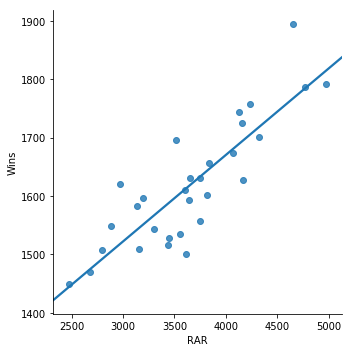

In [127]:
sns.lmplot(x='RAR', y='Wins', data=bball_data, ci=None, fit_reg=True);

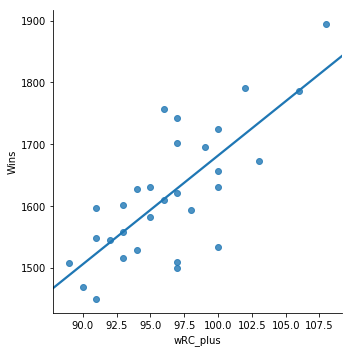

In [128]:
sns.lmplot(x='wRC_plus', y='Wins', data=bball_data, ci=None, fit_reg=True);

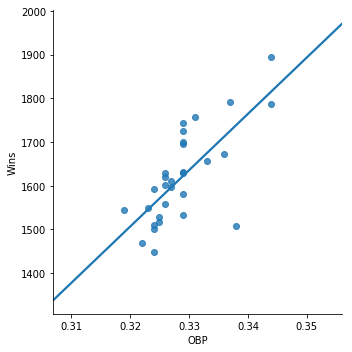

In [129]:
sns.lmplot(x='OBP', y='Wins', data=bball_data, ci=None, fit_reg=True);

RAR, wRC_plus, and OBP all appear to have strong linear relationships with Wins so they are good variables to use moving forward with our model. These will then be our feature columns and y will be our predictor variable which is Wins. 

Before continuing it would be best to divide RAR by 20 as the way the dataset is using it is by adding up all the yearly RAR values for each team.  

In [130]:
bball_data["RAR_yr"] = bball_data[["RAR"]]/20
bball_correlations = bball_data.corr();
bball_correlations['Wins'].sort_values(ascending = False).head(5)

Wins        1.000000
RAR         0.851050
RAR_yr      0.851050
wRC_plus    0.760739
OBP         0.719096
Name: Wins, dtype: float64

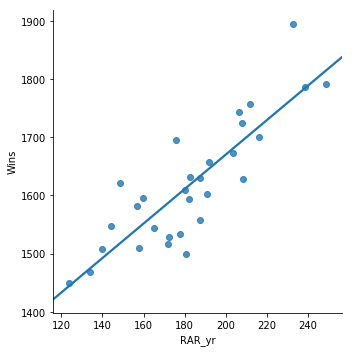

In [131]:
sns.lmplot(x='RAR_yr', y='Wins', data=bball_data, ci=None, fit_reg=True);

This does not change the value of the correlation, just the metric used for the variable.

In [132]:
feature_cols = bball_data[['RAR_yr', 'wRC_plus', 'OBP']]
X = feature_cols
y = bball_data.Wins

Since these variables all seem to follow a strong linear model we will use a linear regression.
sklearn provides us with the .LinearRegression function which we can use to fit a model on our data.
It also provides us with a .score function that can be used to give us our R^2 value.  
Below the MSE is outputted followed by the R^2

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()
model = lr.fit(X, y)
y_pred = lr.predict(X)

print(metrics.mean_squared_error(y, y_pred))
lr.score(X,y)

2318.0265554302564


0.7894083463992914

Just based on this it is difficult to know how good an MSE of 2318 is, but .789 is a fairly good score.

This can be visualized through a scatter plot which appears to follow a fairly strong model.

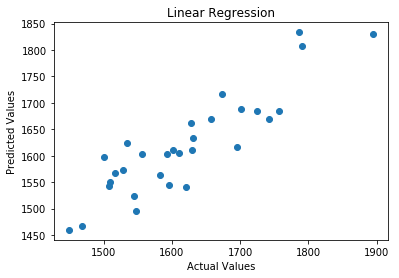

In [134]:
plt.scatter(y, y_pred)
plt.title("Linear Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values");

An R^2 of .79 is strong, but there are other ways to try to improve on this.
One way is to use the test_train_split function from sklearn where we can designate a certain percent of the data to train our model on and then we can test it on the rest.
We can start by training on 30%.

In [154]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

X_train30, X_test30, y_train30, y_test30 = train_test_split(X, y, test_size = 0.3)

lr = LinearRegression()
lr.fit(X_train30, y_train30)

y_pred30 = lr.predict(X_test30)

print(metrics.mean_squared_error(y_train30, lr.predict(X_train30)))
print(metrics.mean_squared_error(y_test30, y_pred30))
lr.score(X_test30, y_test30)

2223.9567410190716
3112.452962143656


0.5519087391071256

Testing on 30% of the data did gave us a worse score than before, 0.552 vs .789.  Our training MSE is larger than the testing at 2223 vs 3112, so it is possible we are overfitting.  The graph below gives us a better understanding as we see that testing on 30% of 30 data points is only 9 observations.  This is most likely too few data points to be using.

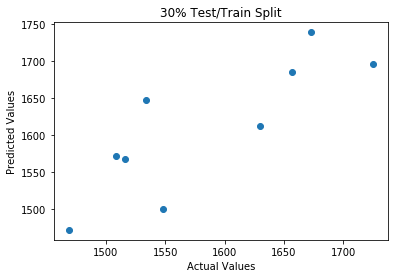

In [155]:
plt.scatter(y_test30, y_pred30)
plt.title("30% Test/Train Split")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values");

Since 30% was too few data points testing on 50% may perform better.

In [163]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

X_train50, X_test50, y_train50, y_test50 = train_test_split(X, y, test_size = 0.5)

lr = LinearRegression()
lr.fit(X_train50, y_train50)

y_pred50 = lr.predict(X_test50)

print(metrics.mean_squared_error(y_train50, lr.predict(X_train50)))
print(metrics.mean_squared_error(y_test50, y_pred50))

lr.score(X_test50, y_test50)

2038.6013095024016
2883.8117047853675


0.7137705119926439

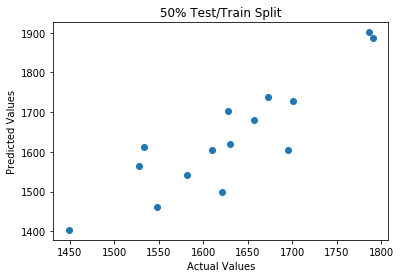

In [138]:
plt.scatter(y_test50, y_pred50)
plt.title("50% Test/Train Split")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values");

Our score of 0.713 is much better then when testing on 30%, but still not as good as our original score.  In this case we should try to use cross validation as this may work better for our small dataset.

#### Cross Validation

With a small dataset it is best to use Leave One Out Cross Validation meaning we use K splits where K is the number of rows in our data.  We can then run K Cross Validation models using the train.test split method.  Once all of these are run we can use the mean of the result.

In [164]:
bball_data.shape

(30, 47)

There are 30 rows so we will use K=30

In [165]:
from sklearn import model_selection
kf = model_selection.KFold(n_splits=30, shuffle=True)

In [166]:
mse_values = []
scores = []
n = 0

for train_index, test_index in kf.split(X, y):             
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    lr = LinearRegression().fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    
    r2 = lr.score(X_test, y_test)
    scores.append(lr.score(X, y))
    
    n += 1

print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of R2 for all folds: 0.7875982862041571


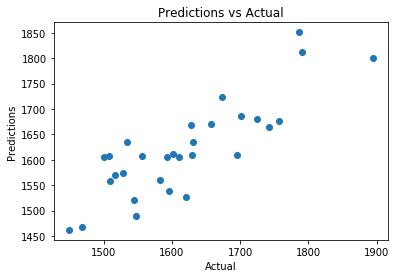

In [168]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(lr, X, y, cv=30)
plt.scatter(y, predictions)
plt.title('Predictions vs Actual');
plt.xlabel("Actual");
plt.ylabel("Predictions");

This result is surprisingly almost the exact same as our original score when using only a linear regression (.788 vs.789).  These scores are very close, but we are better off going with the score we found from our cross validation as this is less prone to overfitting.  Having used only 3 variables to calculate this we could try to add another as usually 3-4 variables are used when creating a model.  If we expand our cuttoff to 0.65 we could include BB_Pct as well.  This is still a strong correlation and walks are one of the biggest statistics used by baseball statistian as well as a leading factor in driving the sabermetric movement.  Bsed on this it would be a good variable to use if it can improve our model.

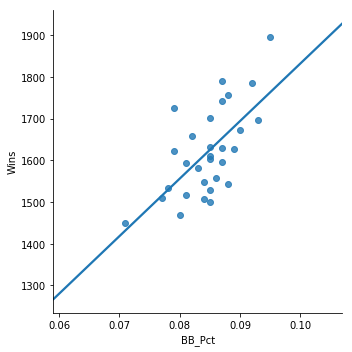

In [169]:
sns.lmplot(x='BB_Pct', y='Wins', data=bball_data, ci=None, fit_reg=True);

In [170]:
feature_cols = bball_data[['RAR_yr', 'wRC_plus', 'OBP', 'BB_Pct']]
X = feature_cols

Run this again using our four variables.

In [171]:
from sklearn import model_selection
kf = model_selection.KFold(n_splits=30, shuffle=True)
mse_values = []
scores = []
n = 0

for train_index, test_index in kf.split(X, y):             
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    lr = LinearRegression().fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    
    r2 = lr.score(X_test, y_test)
    scores.append(lr.score(X, y))
    
    n += 1

print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of R2 for all folds: 0.8082798585522151


Including BB_Pct did improve our model raising our R^2 value to .808, which is a very strong score.  We can test it out on some data from this current year.

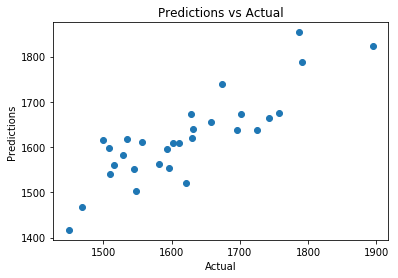

In [172]:
predictions = cross_val_predict(lr, X, y, cv=30)
plt.scatter(y, predictions)
plt.title('Predictions vs Actual');
plt.xlabel("Actual");
plt.ylabel("Predictions");

### Using our Model

We can see how our model would predict teams to do so far in the 2018 season.  Currently the Yankees and Red Sox have the best records in baseball and are always an exciting rivalry to watch.  Below we can see how well they should be doing based on our model.

The Yankees and Red Sox values for RAR, RC_plus, OBP, and BB_Pct are as follows:
- Yankees 125.8, 116, .331, .10
- Red Sox 118.7, 111, .329, .083


Since we used 20 years worth of data we need to divide the output by 20.  Additionally the data we are using is only through 63 and 69 games respectively meaning the RAR values will need to be converted based on these values

In [198]:
(lr.predict([[(125.8*162)/63,116,.331,.10]])/20)*63/162

array([39.36093284])

The Yankees currently have a 43-20 record, but according to the model should have a 39-24 record, which is not far off.

In [199]:
(lr.predict([[(118.7*162)/69,111,.329,.083]])/20)*69/162

array([39.2737211])

The Red Sox currently have a 47-22 record, but should only have a 39-30 record accordig to our model.

Another way to use our model is to look at who will finish with the best record in baseball.  The Yankees and Red Sox are contenders, but the Cubs and Astros also favorites. Their statistics for RAR, RC_plus, OBP, and BB_Pct are as follow.
- Cubs:  133.8	103  .339 .0903
- Astros: 130.6 114 .333 .089

In [200]:
(lr.predict([[(125.8*162)/63,116,.331,.10]])/20)

array([101.21382729])

In [201]:
(lr.predict([[(118.7*162)/69,111,.329,.083]])/20) 

array([92.20786693])

In [202]:
(lr.predict([[(133.8*162)/65,103,.339,.0903]])/20) 

array([97.13457159])

In [203]:
(lr.predict([[(130.6*162)/70,114,.333,.089]])/20) 

array([96.8815129])

Based on our model the top teams would finish as follows:
- Yankees 101 Wins
- Cubs 97 Wins
- Astros 97 Wins
- Red Sox 92 Wins

_________________________________________________________